In [1]:
import sys
sys.path += [".."]

In [2]:
import smbh
import numpy as np

import matplotlib.pyplot as plt

# Natural units

## Gravitational constant

$m \rightarrow 10^5 M_{\theta}$

$t \rightarrow 1 \text{ Gyr}$

$d \rightarrow 1 \text{ kpc}$

$$
    G = G_0 \left(\dfrac{1 \text{ kpc}^3}{\left(3.0857\times10^{19}\right)^3  \text{ m}^3}\right)\left(\dfrac{\left(3.154\times10^{16}\right)^2 \text{ s}^2}{1 \text{ Gyr}^2}\right)\left(\dfrac{1.98847\times10^{35} \text{ kg}}{10^5 M_\theta}\right)
$$

In [1]:
from scipy.constants import G as G_0 # m3s-2kg-1

kpc = 3.0856776e19 # in m
gyr = 60 * 60 * 24 * 365.25 * 1e9 # in s
sm = 1.98847e30 # in kg

distance = kpc ** -3
time = gyr ** 2
mass = sm * 1e5 # 1e5 solar masses base unit

G = G_0 * distance * time * mass

print(G)

0.4498489819471222


## Hubble constant

$$
    H = H_0 \left(\dfrac{1 \text{ kpc}}{3.0857\times10^{16} \text{ km}}\right)\left(\dfrac{3.154\times10^{16} \text{ s}}{1 \text{ Gyr}}\right)\left(\dfrac{1 \text{ Mpc}}{1000 \text{ kpc}}\right)
$$

In [4]:
H_0 = 67.66
kpc2 = 1 / (3.0856776e16) # 1 kpc in km
factor = (kpc2 * gyr / 1000)
H = H_0 * factor
# H = H_0 / 1000

print("%e"%factor)

H

1.022712e-03


0.06919670467193331

# Distributions
## Dark matter density

$$
    \rho_\text{DM}(r) = \dfrac{\rho_0^\text{DM}}{\frac{r}{R_s}\left(1 + \frac{r}{R_s}\right)^2}
$$

```
double darkMatterDensity(double r)
{
    // r += SOFTENING_RADIUS;
    double factor = r / DARK_MATTER_SCALE_RADIUS;
    return DARK_MATTER_DENSITY_0 / (factor * pow(1 + factor, 2));
}
```

## Dark matter cumulative mass

$$
    M_{DM}(r) = 4\pi\rho_0^\text{DM}R_s^3\left[\ln\left(\dfrac{R_s + r}{R_s}\right) - \dfrac{r}{R_s + r}\right] \qquad M_{DM}(R_{vir}) \equiv M_h
$$

```
double darkMatterMass(double r)
{
    double factor = log(1 + r / DARK_MATTER_SCALE_RADIUS) - r / (DARK_MATTER_SCALE_RADIUS + r);
    return 4 * PI * DARK_MATTER_DENSITY_0 * factor * pow(DARK_MATTER_SCALE_RADIUS, 3);
}
```

## Hernquist density

$$
    \rho_B(r) = \dfrac{M_T^B \mathcal{R}_s}{2\pi r(r + \mathcal{R}_s)^3}
$$

```
double stellarDensityHernquist(double r)
{
    // r += SOFTENING_RADIUS;
    return STELLAR_TOTAL_MASS * STELLAR_SCALE_LENGTH / (2 * PI * r * pow(r + STELLAR_SCALE_LENGTH, 3));
}
```

## Hernquist cumulative mass

$$
    M_S(r) = \dfrac{M_T^S r^2}{(r + \mathcal{R}_s)^2} \qquad M_T^S = \beta f_bM_h \text{ where $\beta$ is the percentage of stellar mass from the total baryonic composition}
$$

```
double stellarMassHernquist(double r)
{
    return STELLAR_TOTAL_MASS * pow(r / (r + STELLAR_SCALE_LENGTH), 2);
}
```

## Constants assigment

### R vir
$$
    \bar{\rho} = \dfrac{M}{V} = \dfrac{M_h}{4/3\pi R_\text{vir}^3} = \dfrac{3M_h}{4\pi R_\text{vir}^3} \equiv 200 \rho_\text{crit} = 200\left(\dfrac{3H^2}{8\pi G}\right)
$$

$$
    \text{R_VIR} = R_\text{vir} = \left(\dfrac{GM_h}{100 H^2}\right)^{1/3} \approx 9.79 \text{ kpc}
$$

### DARK_MATTER_SCALE_RADIUS
$$
    \text{DARK_MATTER_SCALE_RADIUS} = R_s = \dfrac{R_\text{vir}}{c}
$$

### DARK_MATTER_DENSITY_0
To obtain the value of $\rho_0^\text{DM}$, the cumulative dark matter mass was evaluated at $R_\text{vir}$.
$$
    M_h \equiv M_\text{DM}(R_\text{vir}) = 4\pi\rho_0^\text{DM}R_s^3 \left[\ln\left(\dfrac{R_s + c(M_h, z)R_s}{R_s}\right) - \dfrac{c(M_h, z)R_s}{R_s + c(M_h, z)R_s}\right]
$$
$$
    \text{DARK_MATTER_DENSITY_0} = \rho_0^\text{DM} = \dfrac{M_h}{4\pi R_s^3 \left[\ln\left(1 + c(M_h, z)\right) - \dfrac{c(M_h, z)}{1 + c(M_h, z)}\right]}
$$

```
double darkMatterDensity0(double c)
{
    double factor = log(1 + c) - c / (1 + c);
    return HALO_MASS / (4 * PI * pow(DARK_MATTER_SCALE_RADIUS, 3) * factor);
}
```

### STELLAR_SCALE_LENGTH

$$
    R_{1/2} = \left(1 + \sqrt{2}\right)\mathcal{R}_s \qquad \longrightarrow \qquad \mathcal{R}_s = \dfrac{R_{1/2}}{1 + \sqrt{2}} = \dfrac{0.01 R_\text{vir}}{1 + \sqrt{2}}
$$

In [5]:
R_VIR = ((G * 1e3) / (100 * H**2)) ** (1/3)
print(R_VIR)
smbh.setR_vir(R_VIR)
smbh.printConstants()

9.794117400135734


on terminal:
```
R_VIR: 9.790000
DARK_MATTER_SCALE_RADIUS: 2.447500
DARK_MATTER_DENSITY_0: 6.705613
STELLAR_SCALE_LENGTH: 0.040552
GAS_DENSITY: 0.449503
```

In [6]:
smbh.darkMatterDensity0(4)

6.697159641322615

## Dynamical Friction Collisionless

$$
    a_\text{DF}^\text{DM}(r, v) = -4\pi G^2 M_\bullet\rho(r) \times \ln \Lambda\left(\text{erf}{X} - \dfrac{2}{\sqrt{\pi}}Xe^{-X^2}\right)\dfrac{\vec{v}}{v^3}
$$
$$
    X \equiv \dfrac{|v|}{\sqrt{2}\sigma_\text{DM}} \qquad \text{with } \sigma_\text{DM}(r) = \sqrt{\dfrac{GM_\text{DM}}{2R_\text{vir}}}
$$

```
double *dynamicalFrictionDM(double *position, double *speed)
{
    double r = getNorm(position);
    double v = getNorm(speed);

    double mass = HALO_MASS;
    // double mass = darkMatterMass(r);
    double sigma = pow(0.5 * G0 * mass / R_VIR, 0.5);
    double x = v / (pow(2, 0.5) * sigma);

    double rho = darkMatterDensity(r) + stellarDensityHernquist(r);
    double factor = -4 * PI * pow(G0, 2) * SMBH_MASS * rho * LN_LAMBDA
                * (erf(x) - 2 / pow(PI, 0.5) * x * exp(-pow(x, 2)));

    factor *= 1 / (pow(v, 3) + SOFTENING_RADIUS);
    // factor *= 0.5;
    double *ac = malloc(3 * sizeof(double));

    ac[0] = factor * speed[0];
    ac[1] = factor * speed[1];
    ac[2] = factor * speed[2];
    return ac;
}
```
## Dynamical Friction Gas

$$
    \mathcal{M} \equiv \dfrac{v}{c_s}
$$

$$
    c_s \approx 1.8(1 + z)^{1/2}\left(\dfrac{M_h}{10^7M_\odot}\right)^{1/3}\left(\dfrac{\Omega_M h^2}{0.14}\right)\text{ kms$^{-1}$}
$$


```
double getLocalSoundSpeed(double z)
{
    double factor1, factor2;
    factor1 =  pow(HALO_MASS / 1e2, 1./3);
    factor2 = (MATTER_DENSITY_PARAMETER * pow(h, 2) / 0.14);
    return 1.8 * pow(1 + z, 0.5) * factor1 * factor2;
}
```


$$
    a^\text{gas}_\text{DF}(r, \vec{v}) = -4\pi G^2M_\bullet\rho_\text{gas}(r)\times f(\mathcal{M})\dfrac{\vec{v}}{v^3}
$$
with
$$
    f(\mathcal{M}) = \left\{
    \begin{matrix}
    0.5\ln\Lambda \left[\erf{\dfrac{\mathcal{M}}{\sqrt{2}}} - \sqrt{\dfrac{2}{\pi}}\mathcal{M}e^{-\mathcal{M}^2/2}\right]& \text{if $\mathcal{M} \leq 0.8$}\\
    1.5\ln\Lambda \left[\erf{\dfrac{\mathcal{M}}{\sqrt{2}}} - \sqrt{\dfrac{2}{\pi}}\mathcal{M}e^{-\mathcal{M}^2/2}\right] & \text{if $0.8 < \mathcal{M} \leq 1.7$}\\
    0.5\ln\left(1 - \mathcal{M}^{-2}\right) + \ln\Lambda & \text{if $\mathcal{M} > 1.7$}
    \end{matrix}
    \right.
$$

Gas density is taken as a power law:
$$
    \rho_\text{gas}(r) = \rho_0^\text{gas}r^{-2}
$$
$$
    M_\text{gas}(r) = 4\pi\rho_0^\text{gas}\int_0^r dr = 4\pi\rho_0^\text{gas} r
$$

At the virial radius:
$$
    M_\text{gas}(R_\text{vir}) \equiv (1 - \beta) f_bM_h = 4\pi\rho_0^\text{gas} r
$$

From which one gets:
$$
    \rho_0^\text{gas} = \dfrac{(1 - \beta) f_bM_h}{4\pi R_\text{vir}}
$$

```
GAS_DENSITY = (1 - STELLAR_RATIO) * fb * HALO_MASS / (4 * PI * R_VIR);

double gasDensity(double r)
{
    return GAS_DENSITY * pow(r, -2);
}

double gasMass(double r)
{
  return 4 * PI * GAS_DENSITY * r;
}

double *dynamicalFrictionGas(double *position, double *speed)
{
    double f, all;
    double cs = getLocalSoundSpeed(20);
    double v = getNorm(speed);
    double mach = v / cs;
    if (mach <= 1.7)
    {
        double factor = erf(mach / pow(2, 0.5)) - pow(2 / PI, 0.5) * mach * exp(-0.5 * pow(mach, 2));
        if (mach <= 0.8) f = 0.5 * LN_LAMBDA * factor;
        else f = 1.5 * LN_LAMBDA * factor;
    }
    else f = 0.5 * log(1 - pow(mach, -2)) + LN_LAMBDA;

    double rho = gasDensity(getNorm(position));

    all = -4 * PI * pow(G0, 2) * SMBH_MASS * rho * f / (pow(v, 3) + SOFTENING_SPEED);
    double *ac = malloc(3 * sizeof(double));
    ac[0] = all * speed[0];
    ac[1] = all * speed[1];
    ac[2] = all * speed[2];
    return  ac;
}
```

## Accretion
$$
    \dot{M}_\bullet^\text{Bondi}(r, v) = \dfrac{4\pi G^2 \rho_B(r)M^2_\bullet}{\left(c_s^2 + v^2\right)^{3/2}}
$$

$$
    \dot{M}_\bullet^\text{Edd}(r, v) = \dfrac{(1 - \epsilon)M_\bullet}{\epsilon t_\text{Edd}} \qquad \epsilon = 0.1, \quad t_\text{Edd} = 0.44 \text{ Gyr}
$$

Real accretion is given by:
$$
    \dot{M}_\bullet(r, v) = \left\{
    \begin{matrix}
    \dot{M}_\bullet^\text{Bondi}(r, v) & \text{if $\dot{M}_\bullet^\text{Bondi} < \dot{M}_\bullet^\text{Edd}(r, v)$} \\
    \dot{M}_\bullet^\text{Edd}(r, v) & \text{else}
    \end{matrix}
    \right.
$$


```
double SMBHAccretion(double *position, double *speed)
{
    double r = getNorm(position);
    double v = pow(pow(getLocalSoundSpeed(20), 2) + pow(getNorm(speed), 2), 1.5);

    double bondi = 4 * PI * pow(G0 * SMBH_MASS, 2) * stellarDensityHernquist(r) / v;
    double eddington = (1 - 0.1) * SMBH_MASS / (0.1 * 0.44);
    if (bondi < eddington) return bondi;
    return eddington;
}

```

# Equation of movement

## Choksi et al
$$
    \ddot{x} = \left(-\dfrac{GM_h(x)}{x^2} + a_{DF} - \dot x\dfrac{\dot M_\bullet}{M_\bullet} - qH^2x\right)\hat{x} \qquad \text{as on paper, } M_h(x) = M_{DM}(x)
$$

## Mine
$$
    \ddot{\vec{x}} = \left(-\dfrac{GM(x)}{x^2} - \dot x\dfrac{\dot M_\bullet}{M_\bullet}\right)\hat{x} + \vec{a}_{DF} \qquad M(x) = M_{DM}(x) + M_{S}(x) + M_{G}(x)
$$

```
double gravitationalForce(double r)
{
    double m = darkMatterMass(r);
    m += stellarMassHernquist(r);
    m += gasMass(r);
    return -G0 * m / pow(r, 2);
}

void baseCase(struct reb_simulation* sim)
{
    struct reb_particle *particle = &(sim->particles[0]);
    double pos[3] = {particle->x, particle->y, particle->z};
    double speed[3] = {particle->vx, particle->vy, particle->vz};
    double r = getNorm(pos);
    double dir_[3] = {pos[0] / r, pos[1] / r, pos[2] / r};

    double grav = gravitationalForce(r);
    double *df_g = dynamicalFrictionGas(pos, speed);
    double *df_dm = dynamicalFrictionDM(pos, speed);
    double df[3] = {df_g[0] + df_dm[0], df_g[1] + df_dm[1], df_g[2] + df_dm[2]};

    free(df_g);
    free(df_dm);

    double m_change = SMBHAccretion(pos, speed);
    SMBH_MASS += m_change * SIM_DT;

    double v = getNorm(speed);
    double accretion = v * m_change / SMBH_MASS;

    grav += accretion;

    particle->ax = grav * dir_[0] + df[0];
    particle->ay = grav * dir_[1] + df[1];
    particle->az = grav * dir_[2] + df[2];
}
```


In [7]:
smbh.gravitationalForce(1e-32)

2.2443497817198703e+34

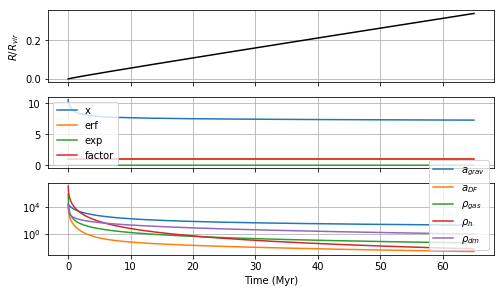

In [9]:
r0 = 0
v0 = 70 * 1.023 # to kpc / gyr

POS = smbh.sphericalToCartesian(r0, np.pi / 4, np.pi / 4)
SPEEDS = smbh.sphericalToCartesian(v0, np.pi / 4, np.pi / 4)

dt = 1e-6
smbh_m = 1
until = 0.065 # gyr
n_points = until // dt
filename = "Results.dat"

smbh.setR_vir(R_VIR)
smbh.printConstants()
t, pos, speeds, masses = smbh.run(POS, SPEEDS, smbh_m, dt, n_points, n_points // 10, filename, delete_file = False)

# t, pos, speeds, masses = smbh.readFile(filename%r_vir)
smbh.plotProperties(t, pos, speeds, masses, R_VIR)

plt.show()